# Advanced Epi II: Introduction to Python
## Lesson 8
- Deep Learning
---
# Introduction to Deep Learning

Deep learning is a **powerful machine learning approach** that utilizes **neural networks** to model complex relationships in data.  
Unlike traditional models, deep learning can **automatically capture intricate interactions** between features, making it ideal for tasks involving:
- **Text** (e.g., Chatbots, Language Translation)  
- **Images** (e.g., Object Recognition, Medical Imaging)  
- **Videos** (e.g., Self-Driving Cars, Face Detection)  
- **Audio** (e.g., Speech Recognition, Music Classification)  
- **Source Code & Data Science** (e.g., AI-assisted Coding, Anomaly Detection)

**Use cases in public health**:
- to predict disease outbreaks.
- to recognize risk factors in electronic health records (EHRs) and identify high-risk patients.
- Deep reinforcement learning can optimize emergency care strategies.
- to analyzes satellite images to map air pollution.
- Etc.

**Deep learning models go beyond standard predictive models** by identifying complex, nonlinear relationships in data.

---

**How neural networks work**:
A neural network consists of **layers of interconnected nodes (neurons)** that process and transform data:

1. **Input Layer**  
   - Represents the **predictive features** (e.g., age, income, pixel values in an image).  
   - This is the **raw data** the model learns from.  
2. **Hidden Layers**
   - These layers **learn abstract features** and **model interactions** between inputs.  
   - Each node aggregates information and **passes it forward** to the next layer.  
   - The **more nodes & layers**, the **more complex interactions** the model captures.  
3. **Output Layer**
   - Generates the final **prediction** (e.g., fraud detection, object classification).  
   - Can be **continuous (regression)** or **categorical (classification)**.

![simple neural network](https://impicode.com/wp-content/uploads/sites/2/2020/12/neural_network_layers_diagram..png)

**Why Are Hidden Layers Important?**
- The **hidden layers** are called **hidden** because their values are **not directly observable** from the input data.
- Instead, they represent **learned abstractions** that improve model performance.
- The more **hidden layers and nodes**, the **better the model captures complex patterns**.

**Example: Predicting Customer Transactions**  
- **Input Layer:** Age, Income, Purchase History  
- **Hidden Layers:** Learn interactions (e.g., "Young customers with high income make frequent purchases").  
- **Output Layer:** Predicts the **number of transactions**.  

**Why is Deep Learning So Powerful?**
- **Automatically captures complex relationships** that traditional models struggle with.  
- **Scales to large datasets** and learns from vast amounts of data.  
- **Can process any data type**: text, images, audio, and more.  
- **Continues improving** with more data and computational power.  

### Forward Propagation in Neural Networks

Neural networks which move from left to right through the network to make predictions, use a **Forward Propagation Algorithm**. At each step, a **matrix multiplication (dot product)** and sum of the values is performed.

**Example: Predicting Bank Transactions**
We want to predict how many transactions a customer will make at our bank. For this, we use two input variables:
- **Number of children the customer has**
- **Number of existing accounts**

In our example, the customer has **2 children** and **3 accounts**.

![example neural network](https://datascience103579984.wordpress.com/wp-content/uploads/2019/09/capture4-4.png)

Each connection between layers has a **weight**, which indicates how strongly an input feature influences a particular hidden neuron.

In our example, we have the following weights:
- From the first input to the top neuron in the hidden layer: **1**
- From the second input to the top neuron in the hidden layer: **1**
- From the first input to the bottom neuron in the hidden layer: **-1**
- From the second input to the bottom neuron in the hidden layer: **1**
- From the top hidden neuron to the output: **2**
- From the bottom hidden neuron to the output: **-1**

To compute the value of a neuron in the hidden layer, **multiply** each input by its respective weight and **sum** the results:

**Top Hidden Neuron:**
$
(2 \times 1) + (3 \times 1) = 2 + 3 = 5
$

**Bottom Hidden Neuron:**
$
(2 \times -1) + (3 \times 1) = -2 + 3 = 1
$

Now, we perform the same computation for the **output neuron**:

$
(5 \times 2) + (1 \times -1) = 10 - 1 = 9
$

The model predicts that the customer will make **9 transactions**.

In [29]:
import numpy as np

input_data = np.array([3, 5])   
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

![simple network example](https://assets.datacamp.com/production/course_3524/datasets/1_4.png)


In [30]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights["node_0"]).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights["node_1"]).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights["output"]).sum()

# Print output
print(output)

-39


### Activation Functions in Neural Networks

When building neural networks, the **multiply-add process** in the hidden layers is only half the story. To unlock the full predictive power of neural networks, we need to apply something called an **activation function** in the hidden layers.

An **activation function** allows the model to capture **non-linear** relationships in the data. 
- **Linear relationships** can be represented with straight-line functions.
- **Non-linear relationships** capture more complex patterns.

![linear vs. non-linear](https://datascience103579984.wordpress.com/wp-content/uploads/2019/09/capture5-4.png)

For example:
- Going from **zero to one child** may impact banking transactions **differently** than going from **three to four children**. 
- A simple **linear transformation** would fail to capture such differences. 
- Instead, **non-linear activation functions** help model these interactions effectively.

An activation function is applied to the value coming into a node. It **transforms** this value before passing it to the next layer. 

Without activation functions, a neural network would just be a **series of linear transformations**, meaning it could only model straight-line relationships. Activation functions introduce the necessary **non-linearity** to make deep learning models powerful.

Today, the most widely used activation function in both industry and research is the **ReLU (Rectified Linear Unit)**:

![ReLu function](https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png)

- Despite being composed of **two linear parts**, ReLU is surprisingly **powerful** when stacked across multiple hidden layers.
- ReLU allows networks to **learn complex patterns** while being computationally efficient.

The ReLu function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

In [53]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


A few years ago, **15-layer neural networks** were considered state of the art. Today, this number can **scale naturally to hundreds or even thousands of layers**! The core idea remains the same: 
- We **apply forward propagation** iteratively through multiple layers.
- The **more layers** we have, the **more complex** patterns the model can learn.

A key insight in deep learning is that neural networks **internally build up representations** of the patterns in data that are useful for making predictions.
- As we go through successive **hidden layers**, the network learns **increasingly complex patterns**.
- This process **reduces** the need for **manual feature engineering** (where humans define predictive features).
- Because of this, **deep learning is often called "representation learning"**.

To better understand this, let's consider how a deep neural network processes an **image**:

![neural network on images](https://datascience103579984.wordpress.com/wp-content/uploads/2019/09/capture9.png)

1. **First Hidden Layers:** Detect **basic patterns** in the image:
   - Nearby pixels
   - Simple shapes like **diagonal lines, horizontal lines, vertical lines, or blurry areas**.
2. **Middle Layers:** Identify **combinations of basic patterns**:
   - Combine lines into **bigger structures**, such as squares or curves.
3. **Deeper Layers:** Recognize **high-level patterns**:
   - Detect **checkerboard textures, faces, cars, or any other meaningful objects**.

The **model automatically discovers** these features—**we don’t explicitly program it to look for diagonal lines or squares**. Instead, as we **train the model** , it **adjusts its weights** to find the most relevant patterns.


![multi-layer neural network](https://assets.datacamp.com/production/course_3524/datasets/ch1ex10.png)

In [54]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights["node_0_0"]).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights["node_0_1"]).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights["node_1_0"]).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights["node_1_1"]).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs *weights["output"]).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


### Loss Functions & Gradient Descent: How Neural Networks Learn

Just because a model has the **structure of a neural network** does **not** guarantee **good predictions**. In fact, the challenge of making accurate predictions increases as we deal with **more complex data points**. At any given set of weights, a neural network makes **many predictions**, each with some **error**. 
To measure how well the network is performing, we use a **loss function**, which **aggregates all individual errors into a single score**.

One of the most common loss functions in **regression** tasks is **Mean Squared Error (MSE)**:

$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$
- We take each error $(y_i - \hat{y}_i)$, **square it**, and compute the **average**.
- A **lower MSE** means a **better model**.

Our goal is to **find the weights** that minimize the **loss function**.

Imagine you are in a **pitch-dark field**, and you need to find the **lowest point**. What do you do?
1. Feel the ground to see **which direction slopes downward**.  
2. Take a **small step downhill**.  
3. Repeat this process until you reach a point where **all directions slope upward** (a minimum).

This is exactly how **gradient descent** works:
- The algorithm **computes the slope** (gradient) of the loss function.
- It **adjusts the weights** step by step in the **downhill direction** to **minimize the loss**.
- Eventually, the algorithm **converges to the lowest loss possible**.

![next example](https://assets.datacamp.com/production/course_3524/datasets/ch2ex4.png)

In [55]:
def predict_with_network(input_data, weights):
    # Beispielcode für einen 2-Schicht-Netzwerk
    node_0_input = (input_data * weights['node_0']).sum()
    node_0_output = node_0_input  # keine Aktivierungsfunktion

    node_1_input = (input_data * weights['node_1']).sum()
    node_1_output = node_1_input

    hidden_layer_outputs = np.array([node_0_output, node_1_output])

    model_output = (hidden_layer_outputs * weights['output']).sum()

    return model_output

In [62]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 2]),
             'output': np.array([1, 1])
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)



In [63]:
model_output_0

np.int64(9)

In [65]:
# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 2]),
             'output': np.array([1, 0])
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


Measure accuracy for each set of weights:

In [67]:
from sklearn.metrics import mean_squared_error

input_data = [np.array([0, 3]), 
              np.array([1, 2]), 
              np.array([-1, -2]), 
              np.array([4, 0])]

target_actuals = [1, 3, 5, 7]

weights_0 = {'node_0': np.array([2, 1]), 
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}

weights_1 = {'node_0': np.array([2, 1]), 
              'node_1': np.array([1, 2]),
              'output': np.array([1, 0])}

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 80.250000
Mean squared error with weights_1: 21.750000


When plotting the mean-squared error loss function against predictions, the slope is $2 * x * (xb-y)$, or `2 * input_data * error`. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). If we add the slopes to your weights, we will move in the right direction. However, it's possible to move too far in that direction. So we  want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving:

![gradient descent](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp)

In [70]:
import numpy as np

input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


updated error

## The Keras Workflow: Building and Training a Neural Network

Keras makes it easy to build and train deep learning models. The workflow consists of **4 key steps**:

1. **Specify the Architecture**

Before training a neural network, we need to define its structure. This involves:
- **Number of layers** – How deep should the network be?
- **Number of nodes per layer** – How many nodes in each layer?
- **Activation functions** – What functions will be applied to transform inputs?

2. **Compile the Model**

Once the architecture is defined, the model needs to be compiled. This step involves:
- **Defining a loss function** – Measures how far predictions are from the actual values.
- **Choosing an optimizer** – Determines how the model updates weights to minimize loss.

3. **Fit the Model (Training)**

The model is trained using **backpropagation and optimization**. This involves:
- **Passing the data through the network**
- **Calculating the error using the loss function**
- **Updating the weights using gradient descent**  
This process is repeated for multiple epochs to improve accuracy.

4. **Make Predictions**

Once trained, the model can be used to **make predictions on new data**.



In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('hourly_wages.csv')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [6]:
predictors = np.array(df.drop("wage_per_hour", axis=1))
predictors

array([[ 0,  8, 21, ...,  0,  1,  0],
       [ 0,  9, 42, ...,  0,  1,  0],
       [ 0, 12,  1, ...,  0,  1,  0],
       ...,
       [ 1, 17, 25, ...,  0,  0,  0],
       [ 1, 12, 13, ...,  1,  0,  0],
       [ 0, 16, 33, ...,  0,  1,  0]])

In [7]:
target = np.array(df['wage_per_hour'])
target

array([ 5.1 ,  4.95,  6.67,  4.  ,  7.5 , 13.07,  4.45, 19.47, 13.28,
        8.75, 11.35, 11.5 ,  6.5 ,  6.25, 19.98,  7.3 ,  8.  , 22.2 ,
        3.65, 20.55,  5.71,  7.  ,  3.75,  4.5 ,  9.56,  5.75,  9.36,
        6.5 ,  3.35,  4.75,  8.9 ,  4.  ,  4.7 ,  5.  ,  9.25, 10.67,
        7.61, 10.  ,  7.5 , 12.2 ,  3.35, 11.  , 12.  ,  4.85,  4.3 ,
        6.  , 15.  ,  4.85,  9.  ,  6.36,  9.15, 11.  ,  4.5 ,  4.8 ,
        4.  ,  5.5 ,  8.4 ,  6.75, 10.  ,  5.  ,  6.5 , 10.75,  7.  ,
       11.43,  4.  ,  9.  , 13.  , 12.22,  6.28,  6.75,  3.35, 16.  ,
        5.25,  3.5 ,  4.22,  3.  ,  4.  , 10.  ,  5.  , 16.  , 13.98,
       13.26,  6.1 ,  3.75,  9.  ,  9.45,  5.5 ,  8.93,  6.25,  9.75,
        6.73,  7.78,  2.85,  3.35, 19.98,  8.5 ,  9.75, 15.  ,  8.  ,
       11.25, 14.  , 10.  ,  6.5 ,  9.83, 18.5 , 12.5 , 26.  , 14.  ,
       10.5 , 11.  , 12.47, 12.5 , 15.  ,  6.  ,  9.5 ,  5.  ,  3.75,
       12.57,  6.88,  5.5 ,  7.  ,  4.5 ,  6.5 , 12.  ,  5.  ,  6.5 ,
        6.8 ,  8.75,

In [8]:
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation="relu", input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation="relu"))

# Add the output layer
model.add(Dense(1))

/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling a Neural Network  

After specifying a model, the next step is to **compile** it, which prepares the network for optimization by setting up internal functions for efficient back-propagation. The `compile` method has two key arguments that need to be chosen carefully:  

1. **Optimizer**: This controls the **learning rate**, which can significantly impact how quickly the model finds optimal weights and even how good those weights ultimately are. A well-chosen learning rate ensures stable and efficient training. There are several optimization algorithms available, but even experts in the field may not be familiar with all their intricacies. A **pragmatic approach** is to choose a **versatile optimizer** that works well in most scenarios. **Adam** is an excellent default choice. It automatically adjusts the learning rate throughout gradient descent to ensure stability and efficiency during weight optimization.  

2. **Loss Function**: This function measures how well the model’s predictions match the actual values. For **regression problems**, the most common choice is **Mean Squared Error (MSE)**, which penalizes larger errors more heavily than smaller ones.  

Even when using a powerful optimizer like **Adam**, **scaling the data** before training is crucial. Ensuring that all features have similar ranges improves numerical stability and enhances the optimization process, leading to **faster convergence** and **better model performance**.  


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.1841  


### Classification models

Deep learning can also be used for **classification tasks**, where the goal is to predict outcomes from a set of **discrete options**. However, there are a few key differences in how classification models are set up compared to regression models:  

1. **Loss Function**:  
   - Instead of using `mean_squared_error` (used for regression), classification models typically use **`categorical_crossentropy`**.  
   - This loss function is specifically designed for multi-class classification problems and helps optimize the model for predicting categorical labels.  

2. **Accuracy as a Metric**:  
   - When compiling the model, you should specify `metrics=['accuracy']`.  
   - This ensures that the model prints out the **accuracy score** at the end of each epoch, making it easier to track progress during training.  

3. **Modifying the Last Layer**:  
   - The **output layer** should have **one node per class**, corresponding to the possible outcomes.  
   - The activation function should be **`softmax`**, which ensures that the output values sum to 1. This allows the predictions to be interpreted as **probabilities**, making it easy to determine the most likely class.  


In [11]:
import pandas as pd

df = pd.read_csv("Titanic All Numeric.csv")
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [12]:
import numpy as np

predictors = np.array(df.drop(["survived", "age_was_missing"], axis=1))
predictors

array([[ 3.        , 22.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [13]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Convert the target to categorical: target
target = to_categorical(df["survived"])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_cols = X_train.shape[1]  # Number of input features

# Set up the model
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=1)

Epoch 1/50
 1/72 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.5000 - loss: 1.0087

/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6672 - loss: 0.7069 - val_accuracy: 0.6983 - val_loss: 0.5676
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.7482 - loss: 0.5477 - val_accuracy: 0.7430 - val_loss: 0.5290
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7763 - loss: 0.5217 - val_accuracy: 0.7709 - val_loss: 0.5019
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.7732 - loss: 0.5143 - val_accuracy: 0.7877 - val_loss: 0.4840
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.7950 - loss: 0.4778 - val_accuracy: 0.7877 - val_loss: 0.4717
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.7999 - loss: 0.4755 - val_accuracy: 0.7765 - val_loss: 0.4633
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.8001 - loss: 0.4702 - val_accuracy: 0.7765 - val_loss: 0.4570
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8111 - loss: 0.4437 - val_accuracy: 0.7765 - val_lo

In [14]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Convert the target to categorical: target
target = df["survived"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_cols = X_train.shape[1]  # Number of input features

# Set up the model
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(n_cols,)))
model.add(Dense(1, activation="sigmoid"))  # Nur 1 Output!

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=1)

Epoch 1/50


/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6911 - loss: 0.6166 - val_accuracy: 0.7374 - val_loss: 0.5419
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.7563 - loss: 0.5270 - val_accuracy: 0.7933 - val_loss: 0.4851
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8167 - loss: 0.4829 - val_accuracy: 0.7933 - val_loss: 0.4555
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8145 - loss: 0.4524 - val_accuracy: 0.7989 - val_loss: 0.4398
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.7988 - loss: 0.4460 - val_accuracy: 0.8101 - val_loss: 0.4296
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8082 - loss: 0.4438 - val_accuracy: 0.8101 - val_loss: 0.4234
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8111 - loss: 0.4489 - val_accuracy: 0.8101 - val_loss: 0.4199
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.8146 - loss: 0.4352 - val_accuracy: 0.8101 - val_lo

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8297 - loss: 0.4069


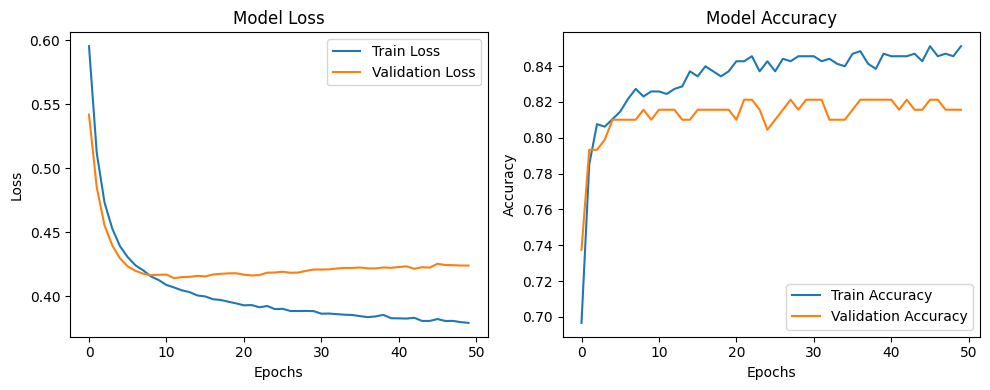

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
predictions = model.predict(X_test)  # Predict on test data
predicted_prob_true = predictions[:,1]  # Extract probability of survival

# Print predictions
print(predicted_prob_true)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

### Real world example

In [2]:
df = pd.read_csv("bumble_google_reviews_cleaned.csv")
df.shape


(65530, 4)

In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Drop missing texts
df = df.dropna(subset=['content'])

# Tokenization
max_vocab_size = 10000
max_length = 100

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['content'])

X = tokenizer.texts_to_sequences(df['content'])
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')

# Labels: convert score (1–5) to 0–4
y = df['score'] - 1

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Define improved model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab_size, 64, input_length=max_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10


/Users/_ariee_/Library/Caches/JetBrains/PyCharm2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


410/410 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.3669 - loss: 1.3878 - val_accuracy: 0.4850 - val_loss: 1.1680
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.5208 - loss: 1.1051 - val_accuracy: 0.4981 - val_loss: 1.1498
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.5591 - loss: 1.0276 - val_accuracy: 0.4934 - val_loss: 1.1624
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.5954 - loss: 0.9602 - val_accuracy: 0.4922 - val_loss: 1.1978
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.6301 - loss: 0.8949 - val_accuracy: 0.4825 - val_loss: 1.2646
Epoch 6/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.6709 - loss: 0.8150 - val_accuracy: 0.4728 - val_loss: 1.3473
Epoch 7/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.7127 - loss: 0.7239 - val_accuracy: 0.4738 - val_loss: 1.4797


In [27]:
# Beispiel-Vorhersage
def predict_review(text):
   #text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded)
    return np.argmax(prediction) + 1  # Rückumwandlung in 1-5

# Test: Wie bewertet das Modell eine neue Rezension?
example_review = "This app is amazing! I love it so much. Best dating app ever."
print("Predicted score:", predict_review(example_review))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted score: 5


In [28]:
predict_review("Alright dating app, there's no fake profile, but subscription is too much expensive")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


np.int64(3)

In [29]:
predict_review("Not sure, what to think about it, every time I have a match my heart gets broken")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


np.int64(3)